In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('Social_Network_Ads.csv')
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# LOGISTIC REGRESSION

In [5]:
# our intension is person will buy a ney car or not
#suppose a company launch a new model then they promote their car in social media
#due to their marketing how many customers are come a buy a car
# 0 means not purchase 1 means purchase

In [6]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [7]:
# input or featureset--->'User ID', 'Gender', 'Age', 'EstimatedSalary''
#output---> Purchased

In [8]:
# how to solve this 
# steps
#1st - pre-processing
#2nd- logistic regression--model
#3rd evaluate

In [9]:
data.iloc[:,[2,3]]

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [10]:
x=data.iloc[:,[2,3]].values
x

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [11]:
y=data.iloc[:,4].values
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [14]:
x_train.shape

(300, 2)

In [15]:
x_test.shape

(100, 2)

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
sc=StandardScaler()

In [18]:
x_train=sc.fit_transform(x_train)
x_train

array([[ 0.58164944, -0.88670699],
       [-0.60673761,  1.46173768],
       [-0.01254409, -0.5677824 ],
       [-0.60673761,  1.89663484],
       [ 1.37390747, -1.40858358],
       [ 1.47293972,  0.99784738],
       [ 0.08648817, -0.79972756],
       [-0.01254409, -0.24885782],
       [-0.21060859, -0.5677824 ],
       [-0.21060859, -0.19087153],
       [-0.30964085, -1.29261101],
       [-0.30964085, -0.5677824 ],
       [ 0.38358493,  0.09905991],
       [ 0.8787462 , -0.59677555],
       [ 2.06713324, -1.17663843],
       [ 1.07681071, -0.13288524],
       [ 0.68068169,  1.78066227],
       [-0.70576986,  0.56295021],
       [ 0.77971394,  0.35999821],
       [ 0.8787462 , -0.53878926],
       [-1.20093113, -1.58254245],
       [ 2.1661655 ,  0.93986109],
       [-0.01254409,  1.22979253],
       [ 0.18552042,  1.08482681],
       [ 0.38358493, -0.48080297],
       [-0.30964085, -0.30684411],
       [ 0.97777845, -0.8287207 ],
       [ 0.97777845,  1.8676417 ],
       [-0.01254409,

In [19]:
x_test=sc.fit_transform(x_test)
x_test

array([[-0.54748976,  0.5130727 ],
       [ 0.15442019, -0.61825566],
       [-0.10879604,  0.14615539],
       [-0.54748976,  0.26846116],
       [-0.10879604, -0.61825566],
       [-0.81070599, -1.53554892],
       [-0.45975102, -1.68843113],
       [-0.0210573 ,  2.25592989],
       [-1.60035469, -0.0678797 ],
       [ 0.94406888, -0.83229075],
       [-0.54748976, -0.6488321 ],
       [-0.72296725, -0.46537345],
       [ 0.06668145, -0.46537345],
       [ 0.24215893,  0.20730828],
       [-1.4248772 ,  0.48249625],
       [-0.37201227,  1.43036596],
       [ 0.06668145,  0.20730828],
       [-1.51261594,  0.45191981],
       [ 1.64597884,  1.8278597 ],
       [-0.10879604, -1.47439603],
       [-0.10879604, -0.70998498],
       [ 0.94406888,  2.25592989],
       [ 0.41763642, -0.58767922],
       [ 0.94406888,  1.06344865],
       [-1.16166097, -1.29093738],
       [ 1.11954637,  2.16420057],
       [-0.72296725,  0.5130727 ],
       [-0.63522851,  0.2990376 ],
       [ 0.06668145,

In [20]:
# Now apply logistic regression
from sklearn.linear_model import LogisticRegression

In [22]:
log_reg=LogisticRegression(random_state=0)

In [23]:
log_reg.fit(x_test,y_test)

LogisticRegression(random_state=0)

In [24]:
y_pred=log_reg.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [25]:
y_test # for check y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [26]:
x_test[:,0]

array([-0.54748976,  0.15442019, -0.10879604, -0.54748976, -0.10879604,
       -0.81070599, -0.45975102, -0.0210573 , -1.60035469,  0.94406888,
       -0.54748976, -0.72296725,  0.06668145,  0.24215893, -1.4248772 ,
       -0.37201227,  0.06668145, -1.51261594,  1.64597884, -0.10879604,
       -0.10879604,  0.94406888,  0.41763642,  0.94406888, -1.16166097,
        1.11954637, -0.72296725, -0.63522851,  0.06668145, -0.37201227,
       -1.33713846,  0.06668145,  1.82145632,  0.06668145, -1.07392223,
       -1.60035469, -1.24939971, -0.19653479, -0.45975102,  1.11954637,
       -0.81070599,  0.41763642, -0.81070599, -0.10879604,  0.59311391,
       -0.81070599,  0.06668145,  1.3827626 , -0.89844474,  1.11954637,
        1.82145632, -0.19653479, -0.10879604, -0.19653479,  1.99693381,
        0.7685914 , -0.63522851, -0.89844474,  1.11954637, -1.16166097,
       -0.37201227,  2.08467255, -1.51261594, -0.0210573 , -1.51261594,
        2.08467255, -1.07392223, -0.81070599,  0.32989768,  0.50

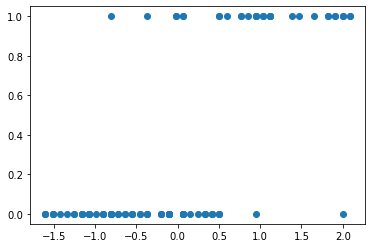

In [27]:
plt.scatter(x_test[:,0],y_test)

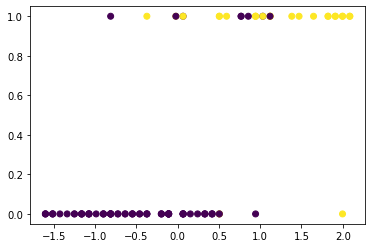

In [28]:
plt.scatter(x_test[:,0],y_test,c=y_pred) # y_test are actual output and y_pred are our prediction

In [30]:
# graph ko dekhke accuracy nahi samaj me ari to iske liye hum---->
from sklearn.metrics import accuracy_score,confusion_matrix

In [32]:
print('Acuracy-',accuracy_score(y_test,y_pred))

Acuracy- 0.9


In [33]:
print('Confusion Matrix',confusion_matrix(y_test,y_pred))
# 8 abd 2 are false predictin 8+2 hai uske vajhse accuracy kam hogayi

Confusion Matrix [[66  2]
 [ 8 24]]


#### * impliment logisticregression with the help of sklearn

In [36]:
# step 1 ] import libraries
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [37]:
# step 2 ] load data
data=load_iris() # ye humare method hai

In [40]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [41]:
X,y=load_iris( return_X_y=True) # ye scikit  ki website ka code hai

In [42]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [43]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [46]:
# step 3 ] create an object of logistic regression 
lr=LogisticRegression(random_state=0)

In [47]:
# step 4 ] train the algorithm ---model---using fit function
lr.fit(X,y)


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [49]:
X[:2,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2]])

In [51]:
# step 5 ] predict using predict function
lr.predict(X[130:132,:])

array([2, 2])

In [52]:
# step 6 ] find the score 
# score function accuracy hume nikal ke deta hai
lr.score(X,y)

0.9733333333333334

In [ ]:
# 97.33 is the accuracy 

In [ ]:
print (print("PythonPrograms", end = ‘ ’))

In [72]:
pp = str(int(7 + 8.0))
print(pp + " happy".upper() + "!")

15 HAPPY!


In [74]:
 lottery = [3, 12, 19, 30, 42, 59] 
lottery.reverse() 
lottery.reverse() 
print(lottery)

[3, 12, 19, 30, 42, 59]


In [75]:
a={3,4,5} 
b={5,6,7} 
a|b

{3, 4, 5, 6, 7}

In [78]:
for i in range(3,3): 
    print(i)

In [84]:
y1=float(input("enter"))
y2=int(input("enter"))
z=(y1-3.6)**2/(y2-3.6)**2
zl;

enter 4.4
enter 5


0.3265306122448982

In [2]:
d=dict()
for x in enumerate(range(2)):
    d[x[0]]=x[1]
    d[x[1]+7]=x[0]
print(d)

{0: 0, 7: 0, 1: 1, 8: 1}
